In [1]:
!pwd

/Users/zahid/Desktop/git/DLRG/DLRG/zahid/assignment_2


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import torch
import torchvision

/Users/zahid/opt/miniconda3/envs/maskrcnn_benchmark/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
trainingdata = torchvision.datasets.MNIST('./MNIST',train=True, transform=torchvision.transforms.ToTensor(), download=False)
testdata = torchvision.datasets.MNIST('./MNIST',train=False, transform=torchvision.transforms.ToTensor(), download=False)

In [5]:
print(len(trainingdata), len(testdata))

60000 10000


## 1. Tensor manipulations. 


```
a) show 5 numbers
```




torch.Size([1, 28, 28]) 5


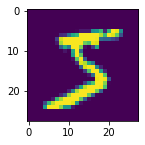

torch.Size([1, 28, 28]) 0


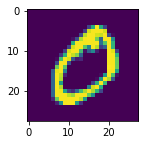

torch.Size([1, 28, 28]) 4


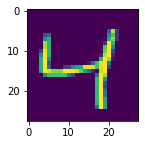

torch.Size([1, 28, 28]) 1


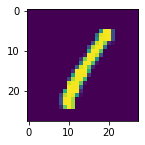

torch.Size([1, 28, 28]) 9


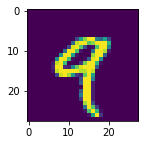

In [6]:
for i in range (5):
  image, label = trainingdata[i]
  print(image.shape, label)
  plt.figure(figsize=(2,4))
  plt.imshow(image.squeeze().numpy())
  plt.show()



```
b) 3rd number rotated counterclockwise using the flip and transpose functions in numpy
```



torch.Size([1, 28, 28]) 4


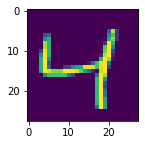

(28, 28)


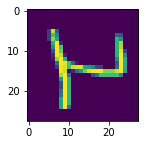

(28, 28)


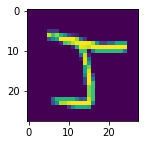

In [7]:
image, label = trainingdata[2]
print(image.shape, label)
im= image.squeeze().numpy()
plt.figure(figsize=(2,4))
plt.imshow(im) #original
plt.show()
print(np.flip(im, axis=1).shape)
plt.figure(figsize=(2,4))
plt.imshow(np.flip(im, axis=1)) #flip
plt.show()
print(np.transpose(np.flip(im, axis=1)).shape)
plt.figure(figsize=(2,4))
plt.imshow(np.transpose(np.flip(im, axis=1))) #flip & transpose
plt.show()



```
c) Create a batch of MNIST digits and flatten it to a single vector.
```



In [8]:
traindataloader = torch.utils.data.DataLoader(trainingdata, batch_size=16, shuffle=False)
print(traindataloader)

In [9]:
images, labels = iter(traindataloader).next()
print(images.size(), labels)
flat_ten= torch.flatten(images)
print(flat_ten.size()) # flatten tensor = 16x1x28x28 = 12544

torch.Size([16, 1, 28, 28]) tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7])
torch.Size([12544])




```
d) Visualize  all : numbers  in the batch  vertically 
```



(16, 28, 28)


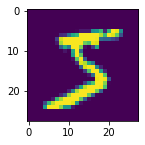

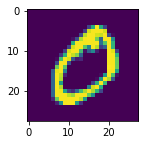

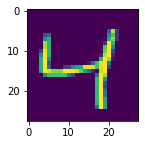

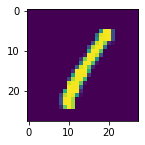

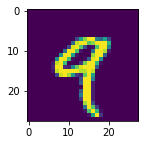

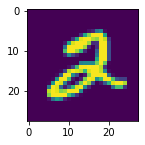

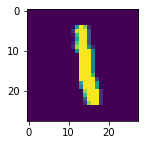

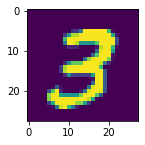

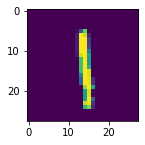

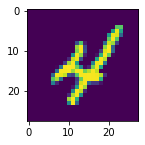

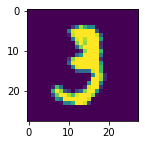

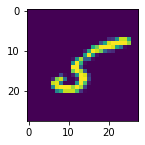

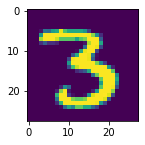

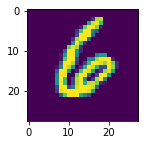

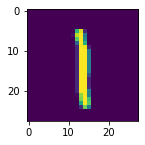

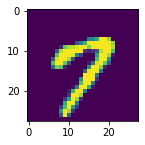

In [10]:
im= images.squeeze().numpy()
print(im.shape)
for i in range(16):
  plt.figure(figsize=(2,4))
  plt.imshow(im[i])
  plt.show()



```
e) Visualize  all numbers  in the batch  horizontally 

```



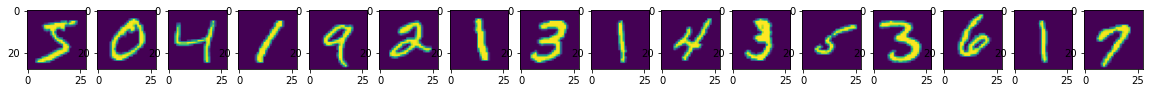

In [11]:
fig, ax = plt.subplots(1,16, figsize=(20,2))
for i in range(16):
    ax[i].imshow(im[i])
    plt.show



```
f) Split the batch dimension into two new batches and plot horizontally.
```



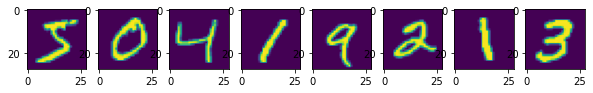

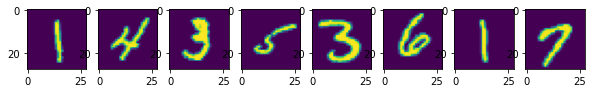

In [12]:
im_1= im[:8] #1st split
im_2= im[8:] #2nd split

fig, ax = plt.subplots(1,8, figsize=(10,2))
for i in range(8):
    ax[i].imshow(im_1[i])
    plt.show
fig, ax = plt.subplots(1,8, figsize=(10,2))
for i in range(8):
    ax[i].imshow(im_2[i])
    plt.show

## 2. More fun with tensor manipulations and plotting.



```
a) Normalize the batch of data [0,1].
```



In [13]:
normalized_batch= images/255.0
print(normalized_batch.shape)
print(normalized_batch)

torch.Size([16, 1, 28, 28])
tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
   



```
b) mean of each sample
```



In [79]:
mean=[]
for i in range(16):
  mean.append(float(torch.mean(images[i])))
print(mean)

[0.1376800686120987, 0.1555372178554535, 0.09725390374660492, 0.08570928871631622, 0.11611644923686981, 0.14806422591209412, 0.0882653146982193, 0.1794067621231079, 0.05439175292849541, 0.10956382751464844, 0.14279711246490479, 0.07127851247787476, 0.17887656390666962, 0.14227192103862762, 0.05813325569033623, 0.12653060257434845]




```
c) Plot the means in a histogram
```



(array([2., 1., 2., 1., 2., 1., 1., 3., 1., 2.]),
 array([0.05439175, 0.06689325, 0.07939475, 0.09189626, 0.10439776,
        0.11689926, 0.12940076, 0.14190226, 0.15440376, 0.16690526,
        0.17940676]),
 <BarContainer object of 10 artists>)

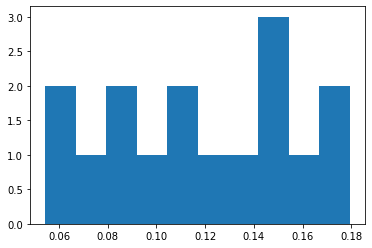

In [15]:
plt.hist(mean)

```
d) Create a 3D plot of a single MNIST digit using matplotlib.
```


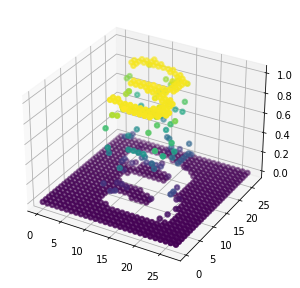

In [16]:
img, label = trainingdata[7]
img = img.squeeze().numpy()

# Create a meshgrid for the x and y coordinates
x, y = np.meshgrid(np.arange(img.shape[0]), np.arange(img.shape[1]))

# Flatten the image and use it as the z coordinate
z = img.flatten()
# Create a 3D scatter plot of the digit
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=z, linewidth=2)


```
e) + f) Order each sample in your MNIST dataset by digit and create a histogram
```


Total sample number= 60000
Label 5: 5421 samples
Label 0: 5923 samples
Label 4: 5842 samples
Label 1: 6742 samples
Label 9: 5949 samples
Label 2: 5958 samples
Label 3: 6131 samples
Label 6: 5918 samples
Label 7: 6265 samples
Label 8: 5851 samples


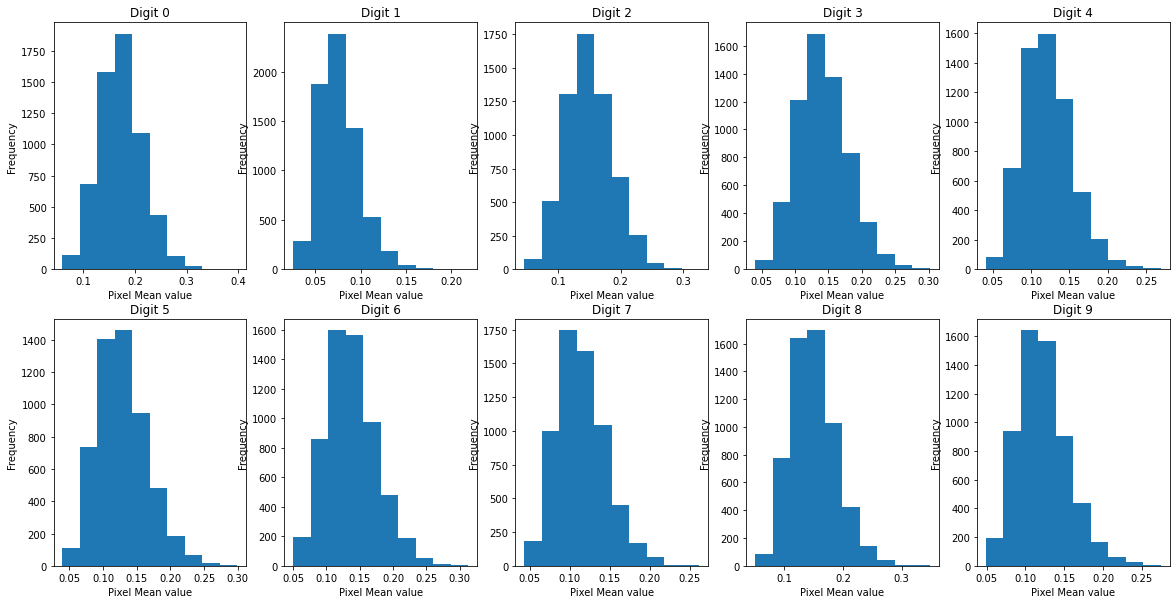

In [127]:
print("Total sample number=", len(trainingdata))
samples_by_label = {}

# Iterate over the dataset
for i in range(len(trainingdata)):
    image= trainingdata[i]
    label = image[1]
    if label not in samples_by_label:
        samples_by_label[label] = []
    samples_by_label[label].append(image)

for label in samples_by_label:
    print('Label {}: {} samples'.format(label, len(samples_by_label[label])))



# Compute the mean of each label and plot the histogram of each label using subplot
fig, ax = plt.subplots(2, 5, figsize=(20, 10))

for key, value in samples_by_label.items():
    mean=[]
    for i in range(len(samples_by_label[key])):
        image= samples_by_label[key][i][0]
        mean.append(float(torch.mean(image)))
    ax[key//5, key%5].hist(mean)
    ax[key//5, key%5].set_title('Digit {}'.format(key))
    ax[key//5, key%5].set_xlabel('Pixel Mean value')
    ax[key//5, key%5].set_ylabel('Frequency')
plt.show()




```
g) Combine all histograms into a single plot.
```

Text(0, 0.5, 'Frequency')

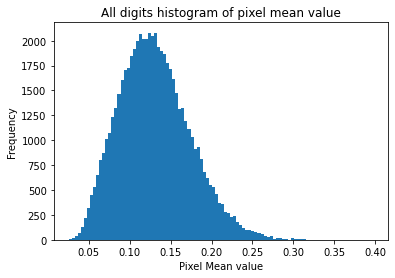

In [128]:
# Now combine the data from all the labels into a single histogram
all_mean=[]

for key, value in samples_by_label.items():
    for i in range(len(samples_by_label[key])):
        image= samples_by_label[key][i][0]
        all_mean.append(float(torch.mean(image)))
        
plt.hist(all_mean, bins=100)
plt.title('All digits histogram of pixel mean value')
plt.xlabel('Pixel Mean value')
plt.ylabel('Frequency')
    


```
h) one-line code to normalize each image in a batch by its corresponding mean
```

In [135]:
# traindataloader = torch.utils.data.DataLoader(trainingdata, batch_size=16, shuffle=False)
# image_batch, label_batch = iter(traindataloader).next()
# print(image_batch.shape, label_batch.shape)
batch_normalized=image_batch/ torch.mean(image_batch, dim=(0, 2, 3), keepdim=True)
# print(batch_normalized.shape)


torch.Size([16, 1, 28, 28]) torch.Size([16])
torch.Size([16, 1, 28, 28])
